# 2HDM-I

In [1]:
from sympy import symbols, init_printing, atan, acos, cos,lambdify
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

Using all the sympy functions we can define

In [2]:
mf,a,tb,cab = symbols(r'm_f,\alpha,t_b,{{C_{\alpha\beta}}}',real=True)
cambioa = {a:atan(tb) - acos(cab)}
cambioa

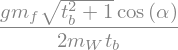

In [3]:
s = 'symbol'
ghff =(g[s]/2)*(mf/mW[s])*(cos(a)/(tb*cos(atan(tb))))

ghff 

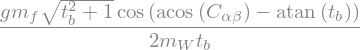

In [4]:
ghff = ghff.subs(cambioa)
ghff

### Python definition of $t$, $b$ and $\tau$ Higgs couplings

We can use sympy symbols to define our Higgs couplings and we will have beautiful latex outputs. After we can use the function lambdify of sympy to convert this symbolic coupling to numeric functions that allow numpy arrays in its arguments 

#### Symbolic definition

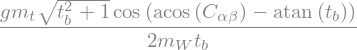

In [5]:
ghtt = ghff.subs(mf,mt[s])
ghtt

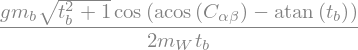

In [6]:
ghbb = ghff.subs(mf,mb[s])
ghbb

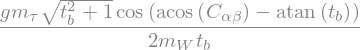

In [7]:
ghtautau = ghff.subs(mf,mtau[s])
ghtautau

#### Numeric definition

We can use the numeric_substitutions function to evaluate all constants

In [8]:
num = numeric_substitutions('All')
num

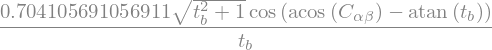

In [9]:
ghtt.subs(num)

Then use lambdify function as follow to implement numeric functions

In [10]:
ghtt_2hdmI = lambdify([cab,tb],ghtt.subs(num),'numpy')
ghtt_2hdmI(0.1,0.2)

In [11]:
ghbb_2hdmI = lambdify([cab,tb],ghbb.subs(num),'numpy')
ghbb_2hdmI(0.1,0.2)

In [12]:
ghtautau_2hdmI = lambdify([cab,tb],ghtautau.subs(num),'numpy')
ghtautau_2hdmI(0.1,0.2)

### Python definition of $W$ and $Z$ Higgs couplings

#### Symbolic definition

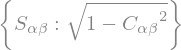

In [13]:
sab = symbols(r'{{S_{\alpha\beta}}}',real=True)
cambio_cab = {sab:sqrt(1-cab**2)}
cambio_cab

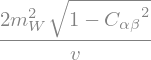

In [14]:
#ghWW1 = (gw[s]*mW[s]*sab).subs(cambio_cab)
#print(ghWW1.subs(num))
ghWW = ((2*mW[s]**2/SMvev[s])*sab).subs(cambio_cab)
ghWW

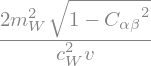

In [15]:
#ghZZ =(gz[s]*mZ[s]*sab).subs(cambio_cab)
ghZZ = ((2*mW[s]**2/(SMvev[s]*cW[s]**2))*sab).subs(cambio_cab)
ghZZ

#### Numeric definition

In [16]:
ghww_2hdmI = lambdify([cab],ghWW.subs(num),'numpy')
ghww_2hdmI(0.1)

In [17]:
ghzz_2hdmI = lambdify([cab],ghZZ.subs(num),'numpy')
ghzz_2hdmI(0.1)

## Initial parameter space

In [18]:
n = 200_000
cabnp = np.random.uniform(-1.0 ,1.0,n)
tbnp = np.random.uniform(0.02 ,50,n)
parameters = {'cab':cabnp,'tb':tbnp}

In [19]:
THDMI = HiggsCouplings()
THDMI.model = '2HDM-I'
THDMI.ghtt = ghtt_2hdmI(cabnp,tbnp)
THDMI.ghbb = ghbb_2hdmI(cabnp,tbnp)
THDMI.ghtautau = ghtautau_2hdmI(cabnp,tbnp)
THDMI.ghWW = ghww_2hdmI(cabnp)
THDMI.ghZZ = ghzz_2hdmI(cabnp)
#THDMI.gCH = 0.5
#THDMI.mCH = np.random.uniform(100,1000,n)

In [20]:
THDMI

2HDM-I couplings
            ghtt      ghbb  ghtautau       ghWW       ghZZ
0       0.614043  0.014818  0.006299  51.372922  66.118142
1       0.375135  0.009053  0.003848  29.430783  37.878100
2       0.264744  0.006389  0.002716  18.558458  23.885166
3       0.717776  0.017322  0.007363  52.431128  67.480078
4       0.517133  0.012480  0.005305  43.452479  55.924349
...          ...       ...       ...        ...        ...
199995  0.568243  0.013713  0.005829  41.532290  53.453020
199996  0.543478  0.013116  0.005575  42.307196  54.450342
199997  0.558889  0.013487  0.005733  43.773008  56.336877
199998  0.137534  0.003319  0.001411   8.953284  11.523084
199999  0.424940  0.010255  0.004359  33.207450  42.738758

[200000 rows x 5 columns]

In [21]:
THDMIspace1 = THDMI.HiggsSignal_parameter_space(parameters,sigma=1)
THDMIspace2 = THDMI.HiggsSignal_parameter_space(parameters,sigma=2)

## Allowed parameter space

We calculate the allowed parameter space to each signal

In [22]:
THDMIspace1.keys()

dict_keys(['Rtau', 'Rb', 'Rgamma', 'Rw', 'Rz', 'Intersection', 'Fermions', 'Vectors'])

In [23]:
THDMIspace1['Rb']#['Cab']

,cab,tb
0,0.060295,2.839566
1,-0.210439,29.427520
2,-0.061446,13.488916
3,0.223482,33.390300
4,-0.201191,18.155462
...,...,...
51328,0.083004,10.945255
51329,0.132435,6.543141
51330,-0.138170,18.185225
51331,0.127231,41.761295


### $$R_{\tau}$$

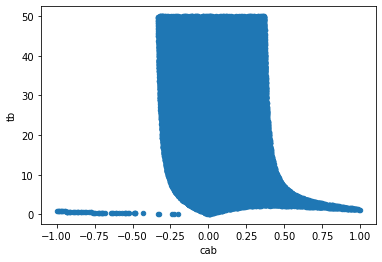

In [24]:
THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter')

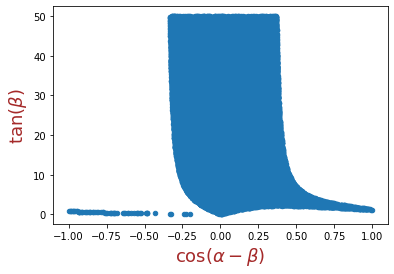

In [25]:
ax = THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
fig = ax.get_figure()
fig.savefig('rtau_space.pdf')

### $$R_{\gamma}$$

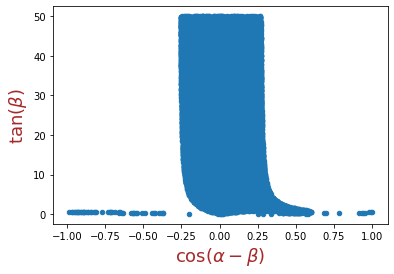

In [26]:
ax = THDMIspace2['Rgamma'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{Z}$$

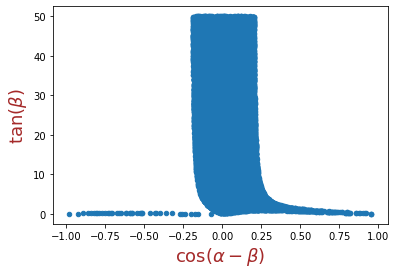

In [27]:
ax = THDMIspace2['Rz'].plot(x='cab',y='tb',kind='scatter')
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

## Intersection

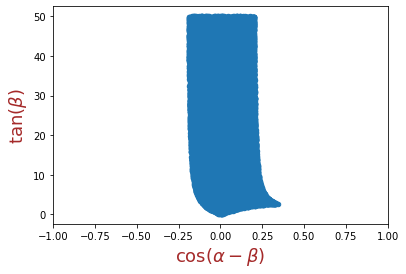

In [28]:
ax = THDMIspace2['Intersection'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
ax.set_xlim((-1,1));

## All Rxs
Using directly matplotlib

In [30]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rgamma','Rw','Rz']
def multiplot(*R):
    data2s = {signal:THDMIspace2[signal] for signal in R}
    plt.figure(figsize=(10,8))
    for k in data2s.keys():
        plt.plot(data2s[k]['cab'],data2s[k]['tb'],'.',label=k,alpha=0.3)
    plt.xlabel(r'$\cos(\beta-\alpha)$');
    plt.ylabel(r'$\tan(\beta)$');
    plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
    plt.legend();

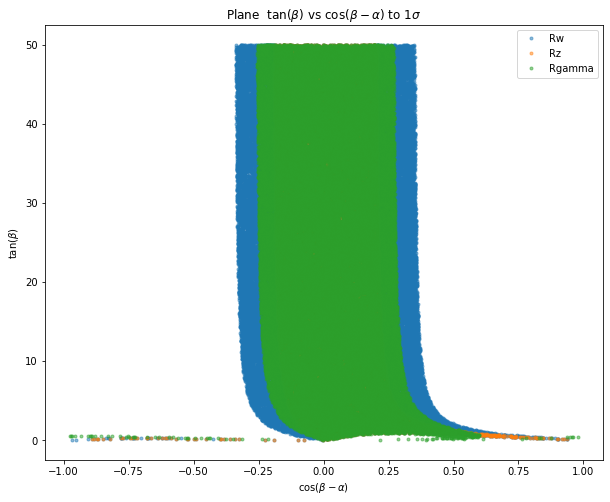

In [31]:
multiplot('Rw','Rz','Rgamma')

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


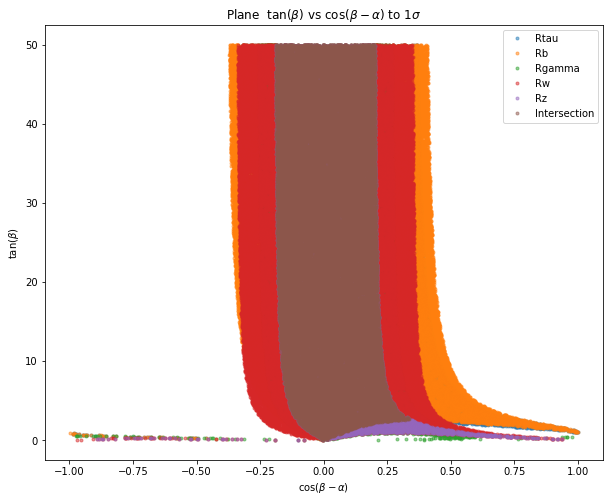

In [32]:
multiplot(*signals)

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

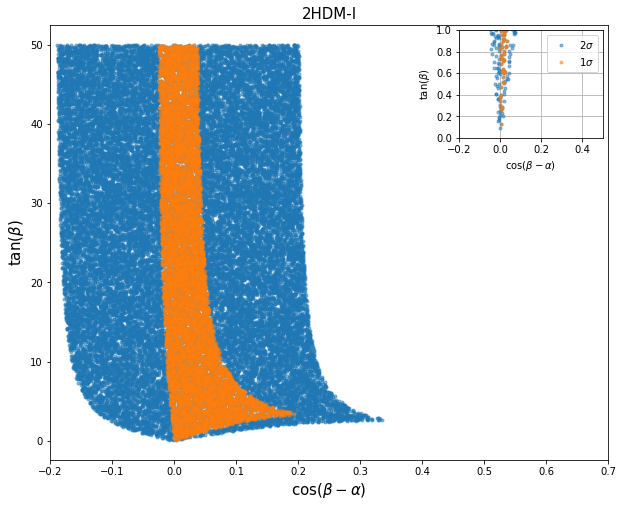

In [34]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}

fig, ax = plt.subplots(1, 1, figsize=[10, 8])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=1,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()